In [47]:
import qiskit as qk

In [48]:
# target machine
sim = qk.Aer.get_backend('qasm_simulator')
# size of the walk in qubits
qdim = 5
# number of steps
steps = 2**(qdim-2)

In [49]:
# allocate main registers
qcoin = qk.QuantumRegister(1, name='coin')
qr = qk.QuantumRegister(qdim, name='nodes')
cr = qk.ClassicalRegister(qdim, name='probs')
qc = qk.QuantumCircuit()

# add registers to the circuit
qc.add_register(qcoin)
qc.add_register(qr)
qc.add_register(cr)

In [50]:
# initial state of the coin
qc.h(qcoin)
qc.s(qcoin)
qc.barrier()

# starting position 
qc.x(int(qdim/2))
qc.barrier()

In [51]:
# main loop
# walk is implemented using multi-control Toffoli
for _ in range(steps):
    qc.h(qr[0]) # toss a coin
    for i in range(qdim):
        qc.mct(qr[0:qdim-i-1], qr[qdim-i-1], None, mode='noancilla')
        qc.x(qr[0:qdim-1])
        qc.mct(qr[0:qdim-i-1], qr[qdim-i-1], None, mode='noancilla')
        qc.x(qr[0:qdim-1])

In [52]:
# final measurement
# ignore the coin register
qc.measure(range(1,qdim), range(0,qdim-1));

In [53]:
# makes sense only for small circuits
# qc.draw(output='mpl') 

In [54]:
job = qk.execute(qc, sim, shots=3000)
res = job.result()
counts = res.get_counts(qc)

decode_counts = {}
for key, value in counts.items():
    decode_counts[str(int(key,2))] = value

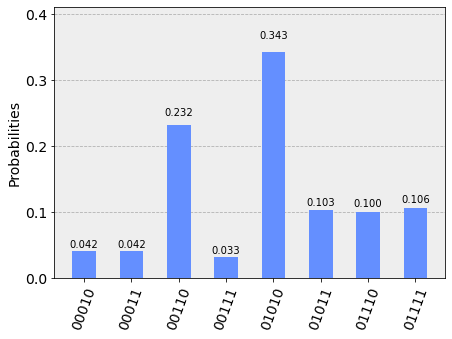

In [55]:
qk.visualization.plot_histogram(counts)

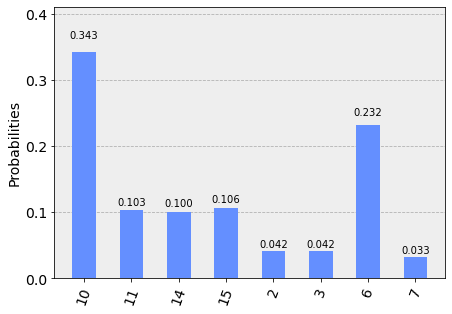

In [56]:
qk.visualization.plot_histogram(decode_counts)